In [1]:
# Import necessary libraries
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import json
from IPython.display import display, Markdown

# Set up matplotlib for inline display in Jupyter
%matplotlib inline
plt.style.use('default')  # Use a clean style

In [2]:
# Configuration
CITY = "London"  # You can change this to any city

In [3]:
# Function to get city coordinates (latitude and longitude)
def get_city_coordinates(city_name):
    """Get latitude and longitude for a given city using a free API"""
    try:
        # Use the Countries Now API to get city coordinates
        url = "https://countriesnow.space/api/v0.1/countries/population/cities"
        response = requests.post(url, json={"city": city_name})
        data = response.json()
        
        if data["error"] == False and "data" in data:
            city_data = data["data"]
            return city_data["lat"], city_data["lng"]
        else:
            # Fallback coordinates if API fails
            print(f"Could not find coordinates for {city_name}, using default")
            return 51.5074, -0.1278  # London coordinates as fallback
    except Exception as e:
        print(f"Error getting coordinates: {e}")
        return 51.5074, -0.1278  # London coordinates as fallback

# Get coordinates for our city
lat, lon = get_city_coordinates(CITY)
print(f"Coordinates for {CITY}: Latitude={lat}, Longitude={lon}")

Error getting coordinates: 'lat'
Coordinates for London: Latitude=51.5074, Longitude=-0.1278


In [5]:
# Function to fetch weather data from Open-Meteo (free, no API key needed)
def fetch_weather_data(latitude, longitude):
    """Fetch current weather and forecast data from Open-Meteo API"""
    try:
        # Current weather endpoint
        current_url = f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current=temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,weather_code,wind_speed_10m&temperature_unit=celsius&wind_speed_unit=ms&precipitation_unit=mm"
        
        # 7-day forecast endpoint
        forecast_url = f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&hourly=temperature_2m,relative_humidity_2m,weather_code&daily=weather_code,temperature_2m_max,temperature_2m_min&temperature_unit=celsius&wind_speed_unit=ms&precipitation_unit=mm&timezone=auto"
        
        # Fetch current weather data
        current_response = requests.get(current_url)
        current_data = current_response.json()
        
        # Fetch forecast data
        forecast_response = requests.get(forecast_url)
        forecast_data = forecast_response.json()
        
        return current_data, forecast_data
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None, None

# Function to interpret weather codes
def interpret_weather_code(code):
    """Convert WMO weather code to human-readable description"""
    weather_codes = {
        0: "Clear sky",
        1: "Mainly clear", 
        2: "Partly cloudy",
        3: "Overcast",
        45: "Fog",
        48: "Depositing rime fog",
        51: "Light drizzle",
        53: "Moderate drizzle",
        55: "Dense drizzle",
        56: "Light freezing drizzle",
        57: "Dense freezing drizzle",
        61: "Slight rain",
        63: "Moderate rain",
        65: "Heavy rain",
        66: "Light freezing rain",
        67: "Heavy freezing rain",
        71: "Slight snow fall",
        73: "Moderate snow fall",
        75: "Heavy snow fall",
        77: "Snow grains",
        80: "Slight rain showers",
        81: "Moderate rain showers",
        82: "Violent rain showers",
        85: "Slight snow showers",
        86: "Heavy snow showers",
        95: "Thunderstorm",
        96: "Thunderstorm with slight hail",
        99: "Thunderstorm with heavy hail"
    }
    return weather_codes.get(code, "Unknown")

In [6]:
# Fetch the weather data
display(Markdown("## Fetching Weather Data"))
current_data, forecast_data = fetch_weather_data(lat, lon)

# Check if we got valid data
if current_data is None or forecast_data is None:
    print("Failed to fetch weather data. Please check your internet connection.")
else:
    # Display basic information about the fetched data
    current = current_data.get('current', {})
    display(Markdown(f"### Current weather in {CITY}"))
    display(Markdown(f"Temperature: {current.get('temperature_2m', 'N/A')}°C"))
    display(Markdown(f"Feels like: {current.get('apparent_temperature', 'N/A')}°C"))
    display(Markdown(f"Conditions: {interpret_weather_code(current.get('weather_code', 0))}"))
    display(Markdown(f"Humidity: {current.get('relative_humidity_2m', 'N/A')}%"))
    display(Markdown(f"Wind Speed: {current.get('wind_speed_10m', 'N/A')} m/s"))
    display(Markdown(f"Precipitation: {current.get('precipitation', 'N/A')} mm"))

## Fetching Weather Data

### Current weather in London

Temperature: 20.0°C

Feels like: 18.4°C

Conditions: Overcast

Humidity: 43%

Wind Speed: 1.79 m/s

Precipitation: 0.0 mm

In [1]:
# Create visualizations
display(Markdown("## Creating Visualizations"))

# Set up the dashboard figure with subplots
fig = plt.figure(figsize=(15, 12))
fig.suptitle(f"Weather Dashboard for {CITY}", fontsize=16, fontweight='bold')

# 1. Current weather summary
ax1 = plt.subplot2grid((3, 2), (0, 0))
if current_data:
    current = current_data.get('current', {})
    temp = current.get('temperature_2m', 'N/A')
    feels_like = current.get('apparent_temperature', 'N/A')
    humidity = current.get('relative_humidity_2m', 'N/A')
    wind_speed = current.get('wind_speed_10m', 'N/A')
    precipitation = current.get('precipitation', 'N/A')
    weather_desc = interpret_weather_code(current.get('weather_code', 0))

    ax1.text(0.5, 0.8, f"{temp}°C", fontsize=24, ha='center', color='#1f77b4')
    ax1.text(0.5, 0.7, f"Feels like: {feels_like}°C", fontsize=12, ha='center', alpha=0.7)
    ax1.text(0.5, 0.6, weather_desc, fontsize=16, ha='center')
    ax1.text(0.5, 0.5, f"Humidity: {humidity}%", fontsize=12, ha='center')
    ax1.text(0.5, 0.4, f"Wind: {wind_speed} m/s", fontsize=12, ha='center')
    ax1.text(0.5, 0.3, f"Precipitation: {precipitation} mm", fontsize=12, ha='center')
    ax1.set_title("Current Weather", fontweight='bold')
    ax1.axis('off')
else:
    ax1.text(0.5, 0.5, "No current weather data", ha='center')
    ax1.axis('off')

# 2. Temperature forecast chart
ax2 = plt.subplot2grid((3, 2), (0, 1), rowspan=2)
if forecast_data and 'hourly' in forecast_data:
    hourly = forecast_data['hourly']
    times = hourly['time'][:24]  # Next 24 hours
    temps = hourly['temperature_2m'][:24]
    
    # Convert time strings to datetime objects
    time_objs = [datetime.strptime(t, "%Y-%m-%dT%H:%M") for t in times]
    
    ax2.plot(time_objs, temps, marker='o', linewidth=2, color='orange')
    ax2.set_title("24-Hour Temperature Forecast", fontweight='bold')
    ax2.set_ylabel("Temperature (°C)")
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax2.grid(True, alpha=0.3)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
else:
    ax2.text(0.5, 0.5, "No forecast data", ha='center')

# 3. Humidity chart
ax3 = plt.subplot2grid((3, 2), (2, 0))
if forecast_data and 'hourly' in forecast_data:
    hourly = forecast_data['hourly']
    times = hourly['time'][:24]  # Next 24 hours
    humidity = hourly['relative_humidity_2m'][:24]
    
    # Convert time strings to datetime objects
    time_objs = [datetime.strptime(t, "%Y-%m-%dT%H:%M") for t in times]
    
    ax3.bar(time_objs, humidity, width=0.05, alpha=0.7, color='skyblue')
    ax3.set_title("24-Hour Humidity Forecast", fontweight='bold')
    ax3.set_ylabel("Humidity (%)")
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax3.grid(True, alpha=0.3)
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
else:
    ax3.text(0.5, 0.5, "No forecast data", ha='center')

# 4. Weather conditions pie chart
ax4 = plt.subplot2grid((3, 2), (2, 1))
if forecast_data and 'hourly' in forecast_data:
    hourly = forecast_data['hourly']
    weather_codes = hourly['weather_code'][:24]  # Next 24 hours
    
    # Count occurrences of each weather type
    weather_counts = {}
    for code in weather_codes:
        weather_type = interpret_weather_code(code)
        weather_counts[weather_type] = weather_counts.get(weather_type, 0) + 1
    
    if weather_counts:
        labels = list(weather_counts.keys())
        sizes = list(weather_counts.values())
        colors = plt.cm.Set3(np.linspace(0, 1, len(labels)))
        
        ax4.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
        ax4.set_title("Weather Conditions Distribution (24-Hour Forecast)", fontweight='bold')
        ax4.axis('equal')
    else:
        ax4.text(0.5, 0.5, "No weather data", ha='center')
else:
    ax4.text(0.5, 0.5, "No forecast data", ha='center')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

NameError: name 'Markdown' is not defined

## 7-Day Temperature Forecast

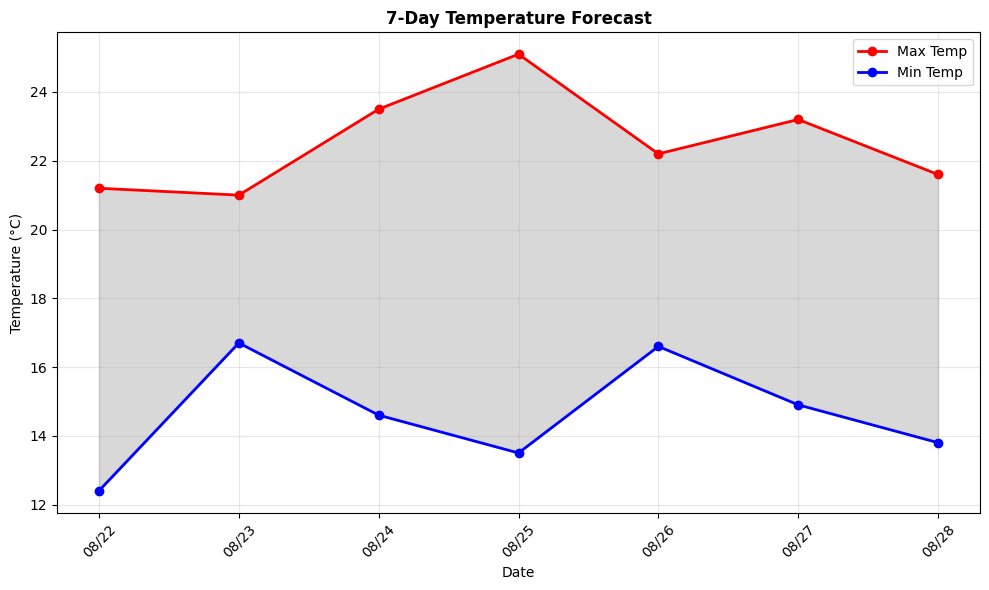

In [8]:
# Additional visualization: 7-day temperature forecast
display(Markdown("## 7-Day Temperature Forecast"))

if forecast_data and 'daily' in forecast_data:
    daily = forecast_data['daily']
    dates = daily['time'][:7]  # Next 7 days
    max_temps = daily['temperature_2m_max'][:7]
    min_temps = daily['temperature_2m_min'][:7]
    
    # Convert date strings to datetime objects
    date_objs = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot max and min temperatures
    ax.plot(date_objs, max_temps, marker='o', linewidth=2, label='Max Temp', color='red')
    ax.plot(date_objs, min_temps, marker='o', linewidth=2, label='Min Temp', color='blue')
    
    # Fill between max and min
    ax.fill_between(date_objs, max_temps, min_temps, alpha=0.3, color='gray')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Temperature (°C)')
    ax.set_title('7-Day Temperature Forecast', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Format x-axis dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print("No daily forecast data available")

In [11]:
# Save the data to a JSON file for future reference
if current_data and forecast_data:
    with open('weather_data.json', 'w') as f:
        json.dump({
            'current': current_data,
            'forecast': forecast_data,
            'retrieved': datetime.now().isoformat(),
            'city': CITY,
            'coordinates': {'lat': lat, 'lon': lon}
        }, f, indent=2)

    display(Markdown("### Data saved to 'weather_data.json'"))
else:
    print("No data to save")

### Data saved to 'weather_data.json'